In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("Mall_Customers.csv")


In [3]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop(['CustomerID'],axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


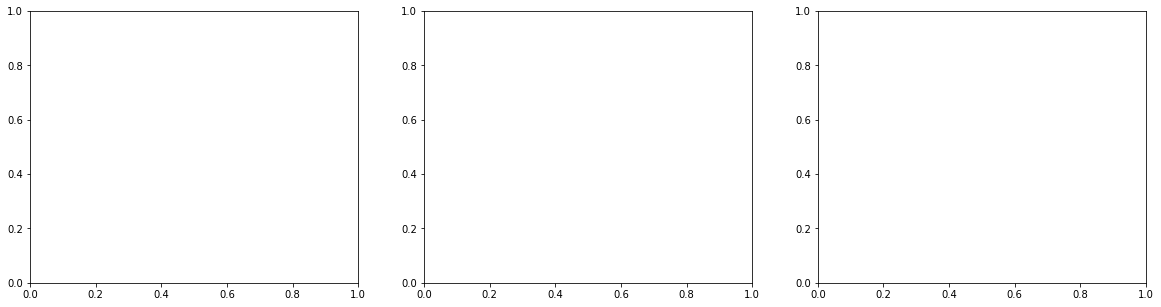

In [5]:
f, axes = plt.subplots(1, 3, figsize=(20, 5)) 

In [19]:
sns.distplot(df['Annual Income (k$)'],color="red", label="Annual Income (k$)",ax=axes[0])
sns.distplot(df['Age'],color="green", label="Age",ax=axes[1])
sns.distplot(df['Spending Score (1-100)'],color="skyblue", label="Spending Score",ax=axes[2])

C:\Users\Pranav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [20]:
a=sns.distplot(df['Annual Income (k$)'],color="red", label="Annual Income (k$)",ax=axes[0])

C:\Users\Pranav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [21]:
plt.show(a)


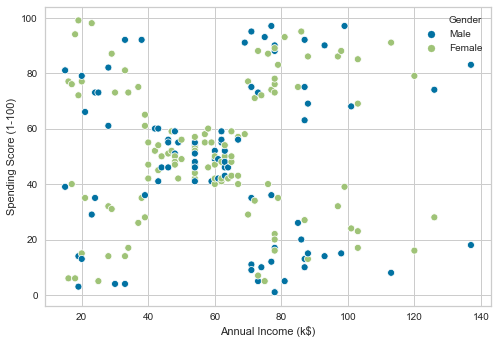

In [22]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",hue="Gender", data=df)

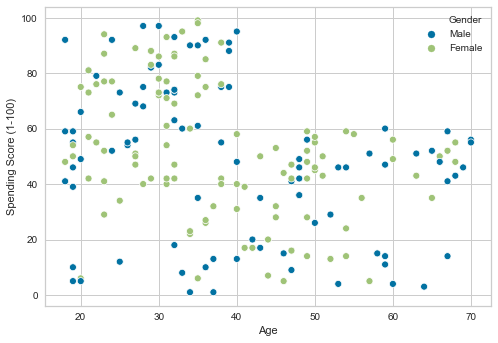

In [23]:
sns.scatterplot(x="Age",y="Spending Score (1-100)",hue="Gender", data=df)

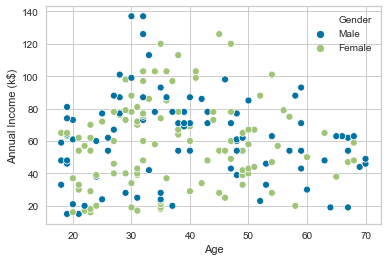

In [12]:
sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Gender", data=df)

In [13]:
from mpl_toolkits.mplot3d import Axes3D

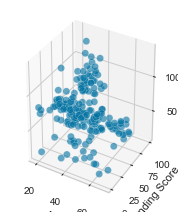

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(234, projection='3d')

xs = df['Age']
ys = df['Spending Score (1-100)']
zs = df['Annual Income (k$)']
b=ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')

plt.show(b)


In [9]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [10]:
X_k = df['Annual Income (k$)'].values
y_k = df['Spending Score (1-100)'].values
#z_k= df['Annual Income (k$)'].values

In [11]:
X_k1 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

In [25]:
len(X_k1)

200

In [79]:
model = KMeans(n_clusters=17)
model.fit(X_k1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [80]:
y_kmeans = model.fit_predict(X_k1)

In [81]:
y_kmeans

array([ 6, 15, 10, 15,  6, 15, 10,  5, 10, 15, 10,  5, 10, 15, 10, 15,  6,
       15,  6,  5,  6, 15, 10, 15, 10,  5,  6, 15,  6,  5, 10, 15, 10,  5,
       10,  5, 10, 15,  6, 15,  6,  5,  6,  2,  6,  2,  2, 11, 11, 11,  2,
        2,  2,  2, 11, 11, 11, 11, 11, 11,  2,  2,  2,  2, 11,  2, 11, 11,
        2, 11,  2, 11, 11,  2, 11,  2,  2, 11, 11, 11, 11,  2, 11, 11,  2,
       11, 12, 12, 12,  0, 12,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,
       12, 12, 12,  0, 12,  0,  0,  0, 12, 12,  0,  0,  0, 12,  0, 12,  0,
       12, 12,  0, 12,  1, 16,  9, 16,  1,  4,  9,  4,  9, 16,  9,  4,  1,
        4,  9,  4,  9,  4,  1, 16,  1,  4,  1, 16,  9,  4,  1,  4,  1,  4,
        9,  4,  1,  4,  9,  4,  9, 16,  9,  4,  1, 16,  9,  4,  1,  3, 13,
        4, 13,  4,  1,  4,  7,  4, 13,  3,  7,  3,  7,  3,  7,  3,  7,  3,
       13,  3,  7,  3, 13,  8,  7,  8, 14,  8, 14,  8, 14])

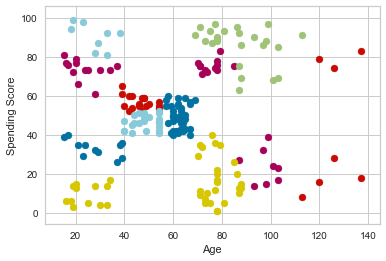

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


In [82]:
labels=set(model.labels_)
print(labels)
for c in labels:
    plt.scatter(X_k1[model.labels_ == c,0],
               X_k1[model.labels_ == c,1],
               label='Cluster {}'.format(c))


plt.xlabel('Age')
plt.ylabel('Spending Score')

plt.show()


In [23]:
centroids = model.cluster_centers_

In [24]:
centroids

array([[29.56451613, 80.74193548],
       [42.95744681, 14.59574468],
       [43.05494505, 47.78021978]])

In [25]:
unique_labels

NameError: name 'unique_labels' is not defined

In [27]:
from yellowbrick.cluster import KElbowVisualizer
elbow=KElbowVisualizer(model, k=(1,10),timings=False)
elbow.fit(X_k1)
elbow.poof()



NameError: name 'model' is not defined

In [33]:
from yellowbrick.cluster import KElbowVisualizer
elbow=KElbowVisualizer(model, metric ='silhouette', k=(1,10))
elbow.fit(X_k1)
elbow.poof()



ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [26]:
X_k


array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

In [13]:
model1=KMeans()

In [14]:
model1.fit(X_k1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

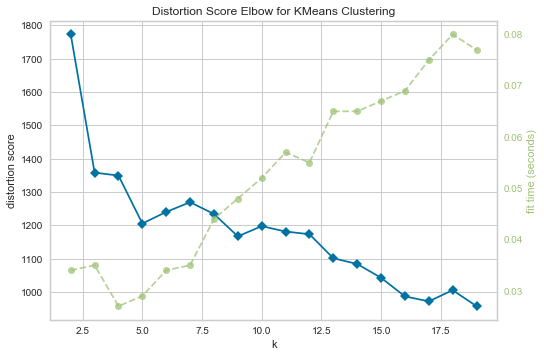

In [28]:
from yellowbrick.cluster import KElbowVisualizer
elbow=KElbowVisualizer(model1, k=(2,20))
elbow.fit(X_k1)
elbow.poof()



In [51]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(model1)



InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000192563CB7F0>,
           embedding='mds', legend=True, legend_loc='lower left',
           legend_size=1.5, max_size=25000, min_size=400, model=None,
           random_state=None, scoring='membership')

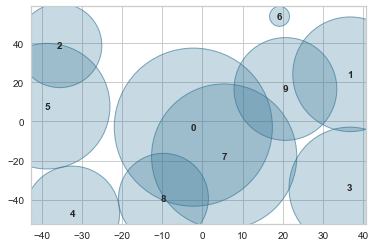

In [86]:
from yellowbrick.cluster import InterclusterDistance
model1=KMeans(n_clusters=10)
# Instantiate the clustering model and visualizer
visualizer1= InterclusterDistance(model1)
visualizer1.fit(X_k1)
